![](https://cdn-images-1.medium.com/max/800/1*jcZLpgh3gppeFFgcpFSP0w.jpeg)

# End to End Pytorch DNN Walkthrough :

This notebook holds end to end Pytorch DNN walkthrough covering all the procedures which are needed to do for a competition.

# Content : 

## 1. Primary Visualization.
## 2. Understanding the solution.
## 3. Creating Dataset.
## 4. Creating Deep Neural Net.
## 5. Model Training.
## 6. Saving best Model.
## 7. Testing on testing data.
## 8. Creating submission.

# Importing supporting libraries : 

At first we need to import basic libraries that'll help us to find the visualize the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from glob import glob
import os
from PIL import Image

Now, we have to load the metadata and see whether that can be used for attributes or not.

In [2]:
train_metadata = pd.read_csv('../input/petfinder-pawpularity-score/train.csv')
train_metadata.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [3]:
test_metadata = pd.read_csv('../input/petfinder-pawpularity-score/test.csv')
test_metadata.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
0,4128bae22183829d2b5fea10effdb0c3,1,0,1,0,0,1,1,0,0,1,0,1
1,43a2262d7738e3d420d453815151079e,0,1,0,0,0,0,1,1,0,0,0,0
2,4e429cead1848a298432a0acad014c9d,0,0,0,1,0,1,1,1,0,1,1,1
3,80bc3ccafcc51b66303c2c263aa38486,1,0,1,0,0,0,0,0,0,0,1,0
4,8f49844c382931444e68dffbe20228f4,1,1,1,0,1,1,0,1,0,1,1,0


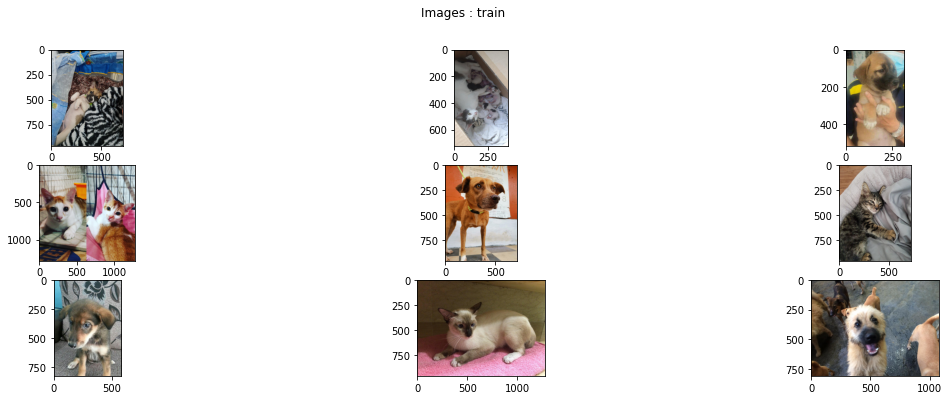

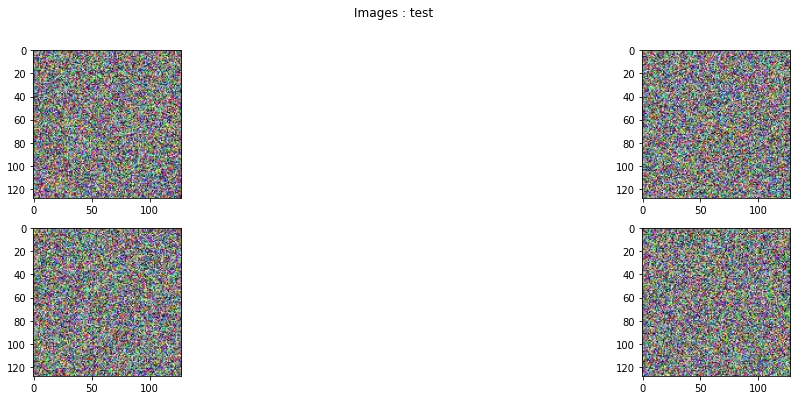

In [4]:
def show_images(folder_name, num_images = 9, shape = (3, 3)):
  row = shape[0]
  col = shape[1]
  assert num_images == row*col,"Total image number is not matching with the size..."
  fig, ax = plt.subplots(row, col, figsize = (20, 6))
  plt.suptitle(f"Images : {folder_name.split('/')[-2]}")
  for index in range(num_images):
    plt.subplot(row, col, index + 1)
    img = load_image(glob(f"{folder_name}/*jpg")[index])
    plt.imshow(img)
  plt.show()
def load_image(source):
  img = cv2.imread(source)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

show_images('../input/petfinder-pawpularity-score/train/')
show_images('../input/petfinder-pawpularity-score/test/', 4, (2, 2) )

In [5]:
train_features = train_metadata.iloc[:,1:-1]
train_features.head()

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
0,0,1,1,1,0,0,1,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0
2,0,1,1,1,0,0,0,0,1,1,0,0
3,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0


In [6]:
Y = train_metadata['Pawpularity']

Now checking through the **Pawpularity score**  if the data holds any outliers or not.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pawpularity'>

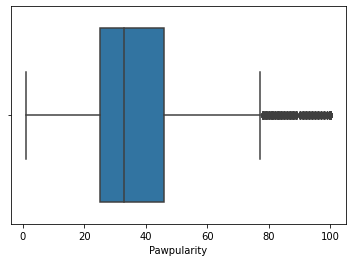

In [7]:
sns.boxplot(Y)

In [8]:
train_features.describe()

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
count,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000
mean,0.027643,0.772599,0.903955,0.861582,0.009988,0.067797,0.129338,0.049637,0.166263,0.172014,0.061239,0.070420
std,0.163957,0.419175,0.294668,0.345356,0.099444,0.251409,0.335591,0.217204,0.372335,0.377411,0.239780,0.255866
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
train_features.shape

(9912, 12)

In [10]:
for column in train_features.columns:
  print(f"{column} : \n{train_features[column].value_counts()}")

Subject Focus : 
0    9638
1     274
Name: Subject Focus, dtype: int64
Eyes : 
1    7658
0    2254
Name: Eyes, dtype: int64
Face : 
1    8960
0     952
Name: Face, dtype: int64
Near : 
1    8540
0    1372
Name: Near, dtype: int64
Action : 
0    9813
1      99
Name: Action, dtype: int64
Accessory : 
0    9240
1     672
Name: Accessory, dtype: int64
Group : 
0    8630
1    1282
Name: Group, dtype: int64
Collage : 
0    9420
1     492
Name: Collage, dtype: int64
Human : 
0    8264
1    1648
Name: Human, dtype: int64
Occlusion : 
0    8207
1    1705
Name: Occlusion, dtype: int64
Info : 
0    9305
1     607
Name: Info, dtype: int64
Blur : 
0    9214
1     698
Name: Blur, dtype: int64


After performing basic EDA on the data now it is time to create the Pytorch dataset that'll generate the dataloader to make batches of data while training.

In [11]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from torchvision.transforms import transforms
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import math
import time
from sklearn.metrics import r2_score
from termcolor import cprint
import warnings
warnings.filterwarnings('ignore')

As in some cases the images are horizontally different we are using the **horizontal flip augmentation** so that the data can be more general.

In [12]:
class PawDataset(Dataset):
  def __init__(self, data_source, metadata, H = 128, W = 128, test_data = False):
    super(PawDataset, self).__init__()
    self.data_source = data_source
    self.metadata = metadata
    self.H = H
    self.W = W
    self.test_data = test_data
    self.augment = self.transform()

  def transform(self):
    augmentation = transforms.Compose(
        [
            transforms.RandomHorizontalFlip(),
        ]
    )
    return augmentation

  def __len__(self):
    return len(self.metadata)

  def __getitem__(self, index):
    # image_link
    source = self.metadata['Id'][index]
    source = os.path.join(f"{self.data_source}{source}.jpg")
    # loading the image and tranforming it into a torh tensor
    image = self.load_image(source)
    # loading metadata
    metadata = self.metadata.iloc[index, 1:13].astype('float32').to_numpy().reshape(1,-1)
    if self.test_data == False:
        # target output
        image = self.augment(image)
        image = transforms.ToTensor()(image)
        target = self.metadata['Pawpularity'][index] / 100.0
        return (image, metadata, target)
    else:
        image = transforms.ToTensor()(image)
        return (image, metadata)
  def load_image(self, source):
    img = cv2.imread(source)
    img = cv2.resize(img, (self.H, self.W))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = Image.fromarray(img)
    return img

Batch size is taken 64 , so that it can be more generalized as well as more specific towards the training data.

In [13]:
BATCH_SIZE = 64

In [14]:
Train_ds = PawDataset('../input/petfinder-pawpularity-score/train/', train_metadata)
Train_dl = DataLoader(Train_ds, batch_size = BATCH_SIZE, shuffle = True)
train_size = int(0.8 * Train_ds.__len__())
val_size = Train_ds.__len__() - train_size
train_ds , val_ds = torch.utils.data.random_split(Train_ds, [train_size, val_size ])
train_dl = DataLoader(train_ds, batch_size = BATCH_SIZE, shuffle = True)
val_dl = DataLoader(val_ds, batch_size = BATCH_SIZE, shuffle = True)
test_ds = PawDataset('../input/petfinder-pawpularity-score/test/', test_metadata, test_data = True)
test_dl = DataLoader(test_ds, batch_size = BATCH_SIZE, shuffle = False)
for patch, metadata, target in train_dl:
  print(patch.shape, metadata.shape, target.shape)
  break
for patch, metadata, target in val_dl:
  print(patch.shape, metadata.shape, target.shape)
  break
for patch, target in test_dl:
  print(patch.shape, target.shape)
  break

torch.Size([64, 3, 128, 128]) torch.Size([64, 1, 12]) torch.Size([64])
torch.Size([64, 3, 128, 128]) torch.Size([64, 1, 12]) torch.Size([64])
torch.Size([8, 3, 128, 128]) torch.Size([8, 1, 12])


Now , we can see that the dataloaders are created and it is actually creating a batch of data.

Now, it's time to generate the Model class. This is the general purpose DNN generation process, and followed by every single researcher.

You can find the model graph [here](https://github.com/sagnik1511/Deep-Learning-Competitions/blob/main/Kaggle/Petfinder%20Pawpularity/assets/petfinder_model_graph.png).

In [15]:
class cnn(nn.Module):
  def __init__(self, in_channels, out_channels, kernel_size = 3, stride = 1, padding = 0):
    super(cnn, self).__init__()
    self.cnn = nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding),
        nn.ReLU(),
        nn.BatchNorm2d(out_channels, momentum = 0.95)
    )
  def forward(self, x):
    return self.cnn(x)

class Network(nn.Module):
  def __init__(self):
    super(Network, self).__init__()
    self.fet_ext = nn.Sequential(
        cnn(3,4),
        cnn(4, 64),   # 128 -> 126
        nn.MaxPool2d(2), # 126 -> 63
        cnn(64, 32),   # 63 -> 61
        nn.MaxPool2d(2),  # 61 -> 30
        cnn(32, 16),  # 30 -> 28
        nn.MaxPool2d(2),
        nn.Dropout(0.15),
        nn.Flatten(), # 14*14*16
    )
    self.fc1 = nn.Sequential(
        nn.Linear(12, 64),
    )
    self.fc2 = nn.Sequential(
        nn.Linear(14*14*16, 1024),
        nn.Linear(1024, 64),
    )
    self.fc3 = nn.Sequential(
        nn.Linear(128, 1),
    )

  def forward(self, im_patch, mt_patch):
      mt_patch = mt_patch.squeeze(dim = 2)
      mt_patch = mt_patch.squeeze(dim = 1)
      cnn_op = self.fet_ext(im_patch)
      fc1_op = self.fc1(mt_patch)
      fc2_op = self.fc2(cnn_op)
      linear_op = torch.cat([fc1_op, fc2_op], axis = 1)
      output = self.fc3(linear_op)
      return output

As the training process can be slow using cpu , we are going to process the training inside the **GPU** itself.

In [16]:
model = Network()
model = model.cuda()
model

Network(
  (fet_ext): Sequential(
    (0): cnn(
      (cnn): Sequential(
        (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1))
        (1): ReLU()
        (2): BatchNorm2d(4, eps=1e-05, momentum=0.95, affine=True, track_running_stats=True)
      )
    )
    (1): cnn(
      (cnn): Sequential(
        (0): Conv2d(4, 64, kernel_size=(3, 3), stride=(1, 1))
        (1): ReLU()
        (2): BatchNorm2d(64, eps=1e-05, momentum=0.95, affine=True, track_running_stats=True)
      )
    )
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): cnn(
      (cnn): Sequential(
        (0): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1))
        (1): ReLU()
        (2): BatchNorm2d(32, eps=1e-05, momentum=0.95, affine=True, track_running_stats=True)
      )
    )
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): cnn(
      (cnn): Sequential(
        (0): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1))
        (1

In [17]:
for name, param in model.named_parameters():
  print(f"{name} | {param.shape} | {param.dtype}")

fet_ext.0.cnn.0.weight | torch.Size([4, 3, 3, 3]) | torch.float32
fet_ext.0.cnn.0.bias | torch.Size([4]) | torch.float32
fet_ext.0.cnn.2.weight | torch.Size([4]) | torch.float32
fet_ext.0.cnn.2.bias | torch.Size([4]) | torch.float32
fet_ext.1.cnn.0.weight | torch.Size([64, 4, 3, 3]) | torch.float32
fet_ext.1.cnn.0.bias | torch.Size([64]) | torch.float32
fet_ext.1.cnn.2.weight | torch.Size([64]) | torch.float32
fet_ext.1.cnn.2.bias | torch.Size([64]) | torch.float32
fet_ext.3.cnn.0.weight | torch.Size([32, 64, 3, 3]) | torch.float32
fet_ext.3.cnn.0.bias | torch.Size([32]) | torch.float32
fet_ext.3.cnn.2.weight | torch.Size([32]) | torch.float32
fet_ext.3.cnn.2.bias | torch.Size([32]) | torch.float32
fet_ext.5.cnn.0.weight | torch.Size([16, 32, 3, 3]) | torch.float32
fet_ext.5.cnn.0.bias | torch.Size([16]) | torch.float32
fet_ext.5.cnn.2.weight | torch.Size([16]) | torch.float32
fet_ext.5.cnn.2.bias | torch.Size([16]) | torch.float32
fc1.0.weight | torch.Size([64, 12]) | torch.float32
fc

Taking basic hyerparameters (This has been taken after long nmber of experiments).

In [18]:
EPOCHS = 10
criterion = nn.MSELoss()
optm = optim.Adam(model.parameters(), lr = 1e-4)

Now, it's the most important process, we have to train the model, so that it can be well fitted as well as more generalized but overfitted.

In [19]:
train_step_loss, val_step_loss = [], []
train_loss, val_loss = [], []
val_best_loss = np.inf
for epoch in range(EPOCHS):
  start_time = time.time()
  print(f"Epoch {epoch + 1} : ")
  epoch_loss = 0.0
  model.train()
  for index, (patch, metadata, target) in enumerate(train_dl):
    optm.zero_grad()
    patch = patch.float().cuda()
    metadata  = metadata.float().cuda()
    target = target.float().cuda()
    op = model(patch, metadata)
    loss = criterion(op, target)
    epoch_loss += loss.item() * patch.shape[0]
    train_step_loss.append(loss.item())
    if index % 10 == 9:
      print(f"step {index + 1} Loss: {'%.4f'%(loss.item())}")
    loss.backward()
    optm.step()
  epoch_loss /= train_size
  print(f"training data --> loss : {'%.4f'%(epoch_loss)}")
  train_loss.append(epoch_loss)
  model.eval()
  val_ep_loss = 0.0
  with torch.no_grad():
      for index, (patch, metadata, target) in enumerate(val_dl):
          patch = patch.float().cuda()
          metadata  = metadata.float().cuda()
          target = target.float().cuda()
          op = model(patch, metadata)
          loss = criterion(op, target)
          val_step_loss.append(loss.item())
          val_ep_loss += loss.item() * patch.shape[0]
  val_ep_loss /= val_size
  print(f"validation data --> loss : {'%.4f'%(val_ep_loss)}")
  val_loss.append(val_ep_loss)
  if val_ep_loss < val_best_loss :
    val_best_loss = val_ep_loss
    cprint("Success...Model Updated...", 'green')
    torch.save(model, 'best_model.pth')
  else:
    cprint("Failed... Model haven't uploaded...", 'red')
  elapsed_time = time.time() - start_time
  print(f"Elapsed time : {'%.2f'%(elapsed_time)} seconds...\n")
cprint("Training completed...", 'blue')

Epoch 1 : 
step 10 Loss: 0.3006
step 20 Loss: 0.0959
step 30 Loss: 0.0634
step 40 Loss: 0.0739
step 50 Loss: 0.0532
step 60 Loss: 0.0753
step 70 Loss: 0.0593
step 80 Loss: 0.0396
step 90 Loss: 0.0641
step 100 Loss: 0.0589
step 110 Loss: 0.0580
step 120 Loss: 0.0475
training data --> loss : 0.0929
validation data --> loss : 0.0511
Success...Model Updated...
Elapsed time : 141.32 seconds...

Epoch 2 : 
step 10 Loss: 0.0504
step 20 Loss: 0.0524
step 30 Loss: 0.0713
step 40 Loss: 0.0435
step 50 Loss: 0.0578
step 60 Loss: 0.0428
step 70 Loss: 0.0688
step 80 Loss: 0.0486
step 90 Loss: 0.0294
step 100 Loss: 0.0462
step 110 Loss: 0.0299
step 120 Loss: 0.0403
training data --> loss : 0.0502
validation data --> loss : 0.0455
Success...Model Updated...
Elapsed time : 102.23 seconds...

Epoch 3 : 
step 10 Loss: 0.0410
step 20 Loss: 0.0272
step 30 Loss: 0.0671
step 40 Loss: 0.0401
step 50 Loss: 0.0329
step 60 Loss: 0.0575
step 70 Loss: 0.0476
step 80 Loss: 0.0318
step 90 Loss: 0.0571
step 100 Loss:

As the last saved model can have too much varinace with the validation data, we are going to use the best saved model so far.

In [20]:
best_model = torch.load('./best_model.pth')

In [21]:
best_model = best_model.cuda()

Now, the model is testing on the output data and one can see the data is getting out is in form of tensors, so we have to process that to fit inside the dataframe.

In [22]:
with torch.no_grad():
    for index, (patch, metadata) in enumerate(test_dl):
        patch = patch.float().cuda()
        metadata  = metadata.float().cuda()
        op = best_model(patch, metadata)

Now, the final dataframe has been prepared, and ready to be submitted.

In [23]:
sub_df = pd.DataFrame({'Id': test_metadata.Id, 'Pawpularity': op.squeeze(dim = 1).cpu().detach().numpy()})
sub_df

,Id,Pawpularity
0,4128bae22183829d2b5fea10effdb0c3,0.308932
1,43a2262d7738e3d420d453815151079e,0.336033
2,4e429cead1848a298432a0acad014c9d,0.345465
3,80bc3ccafcc51b66303c2c263aa38486,0.302493
4,8f49844c382931444e68dffbe20228f4,0.299018
5,b03f7041962238a7c9d6537e22f9b017,0.348645
6,c978013571258ed6d4637f6e8cc9d6a3,0.269310
7,e0de453c1bffc20c22b072b34b54e50f,0.326501


In [24]:
sub_df.to_csv('submission.csv', index = False)